<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
wholesale_customers = pd.read_csv(r"C:\Users\aanas\Desktop\IronWork\GitHub\LABs\w5-lab\lab-unsupervised-learning-en\data\Wholesale_customers_data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
#What does each column mean?

#Based on the link provided for the origin of the df:
#)	CHANNEL: customers Channel or Retail channel
#)	REGION: customers Region
#)  FRESH: annual spending (monetary units (m.u.)) on fresh products;
#)	MILK: annual spending (m.u.) on milk products;
#)	GROCERY: annual spending (m.u.)on grocery products;
#)	FROZEN: annual spending (m.u.)on frozen products;
#)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products;
#)	DELICATESSEN: annual spending (m.u.)on and delicatessen products; 


#Displaying the first columns in the df to have an idea of the data
wholesale_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Your code here:
# Any categorical data to convert?
print (wholesale_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [5]:
#Based on the above, all columns have int values. However, based on the sample returned (with df.head()), it is very likely that the columns "channel" and "region" 
#may have categorical data. I'll be checking for the distinct count of values in each of them

print(wholesale_customers['Channel'].value_counts())
print(wholesale_customers['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [ ]:
#The columns above have categorical data, as only have 2 distinct values (Channel) and 3 distinct values (region). 
#However, there is no need to convert them as they are integers

In [6]:
# Your code here:
# Any missing data to remove?

wholesale_customers.isnull().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [ ]:
#No columns are missing data

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


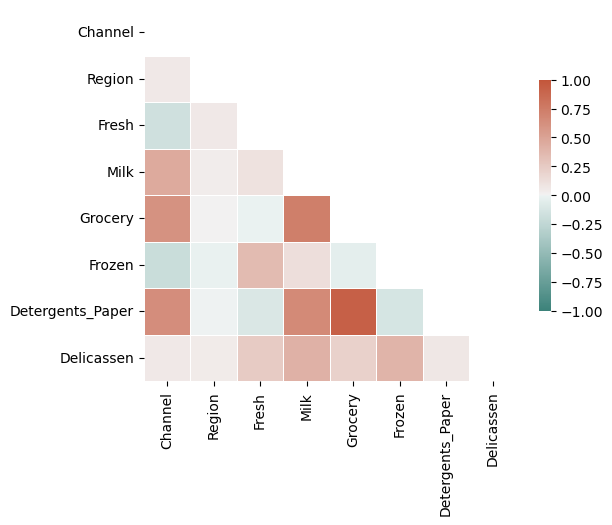

In [7]:
#Your code here:
# Column collinearity - any high correlations?

#creating a correlation matrix
correlation_matrix = wholesale_customers.corr()
print(correlation_matrix)

#creating a heatmap
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 6))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


In [ ]:
#the pair of columns with higher correlation are: 
#   detergents_paper + grocery (0.92)
#   Grocery + Milk (0.73) 

'Descriptive statistics:'

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


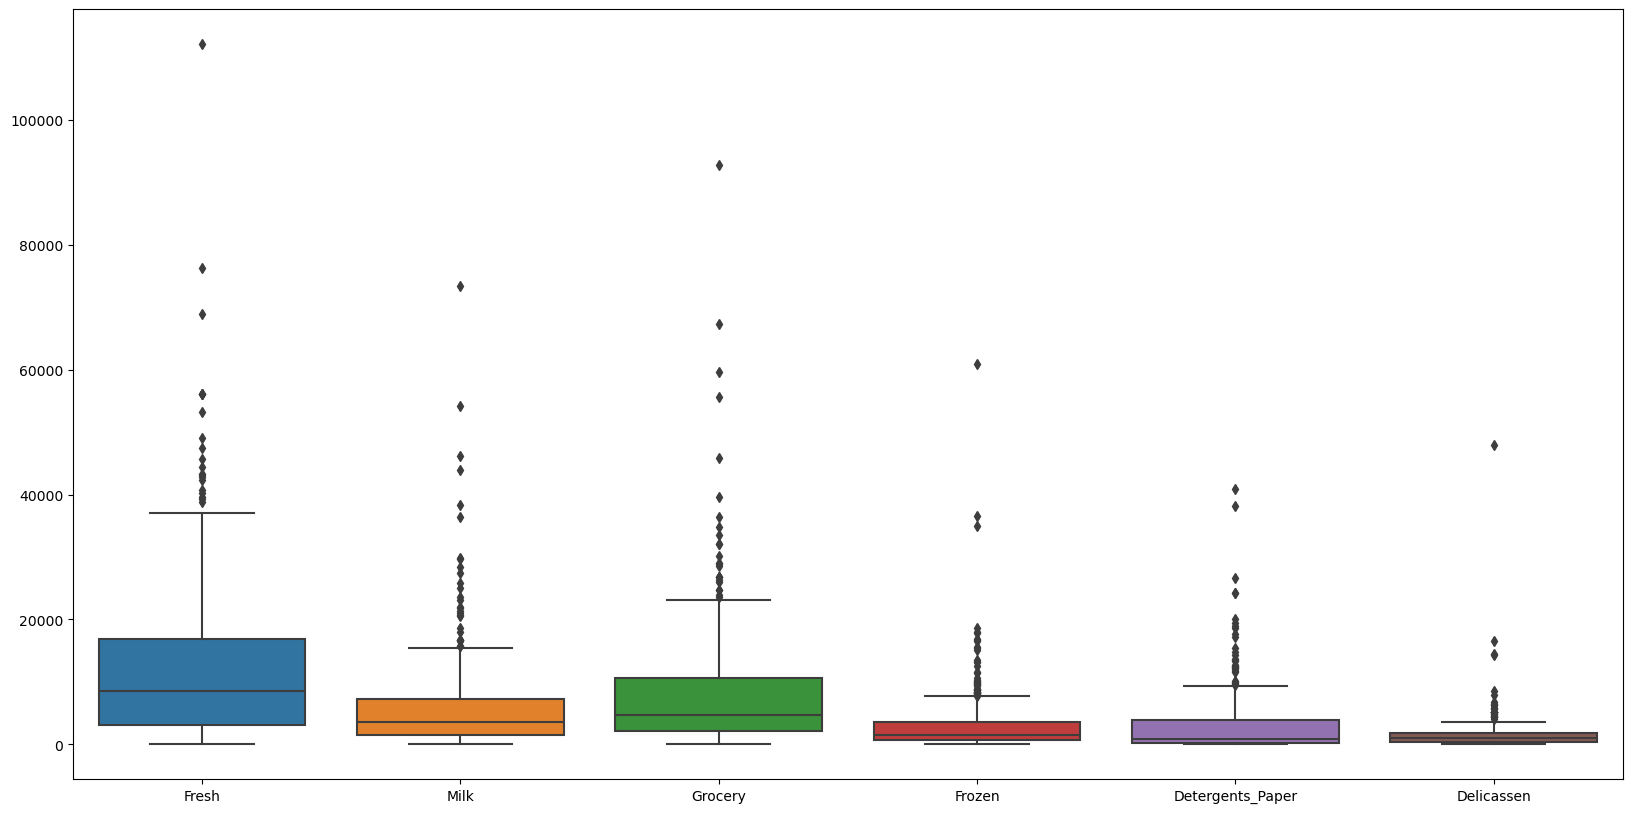

In [8]:
# Your code here:
# Descriptive statistics - any outliers to remove?

#Printing the statistics for eahc column (not considering values for Channel and Region, as these were previously identified as categorical)
display("Descriptive statistics:", wholesale_customers.describe().T)

#Plotting box plots to visually loook for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=wholesale_customers.drop(["Channel","Region"], axis=1))
plt.show()



In [ ]:
#Considering the statistics and the boxplot above, it is noticeable that all numerical variables have outliers
# Because of the dots visible in the boxplot
# because of the min and max values being so distant from the 25% and 75% quartiles respectively
# also, the std deviation values are pretty high for some variables 

In [9]:
# Your code here:
# Column-wise data distribution - is the distribution skewed?

#Calculating skewness
skewness = wholesale_customers.skew()
print (skewness)



Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [ ]:
#A value of skewness close to 0 indicates a symmetric distribution. The columns that have skewness values more distante from 0 are delicassen, frozen and milk
#All of these columns have positive skewness values which indicates distributions with long right tails (right skew)
# This may mean that there are a few outliers that are larger than the majority of the data

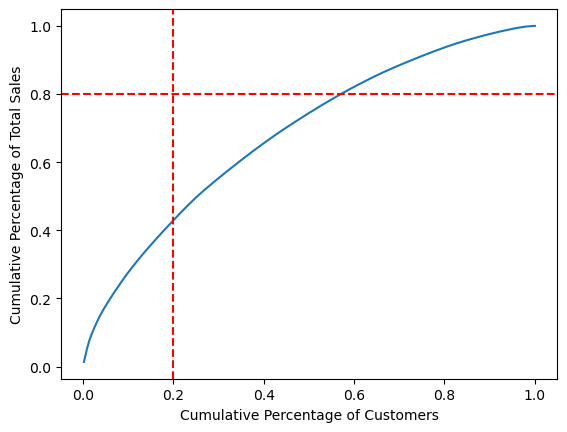

In [10]:
#You code here
#Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. 
#Check if this dataset displays this characteristic

# Creating a new column - Total sales - to calculate the total sales for each customer
wholesale_customers['Total_Sales'] = wholesale_customers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

# Sort customers by total sales in descending order
wholesale_customers_sorted = wholesale_customers.sort_values(by="Total_Sales", ascending=False)

# Calculate cumulative percentage of customers and cumulative percentage of total sales
wholesale_customers_sorted['Cumulative_Customers'] = np.arange(1, len(wholesale_customers_sorted) + 1) / len(wholesale_customers_sorted)
wholesale_customers_sorted['Cumulative_Sales'] = wholesale_customers_sorted['Total_Sales'].cumsum() / wholesale_customers_sorted['Total_Sales'].sum()


# cumulative percentage of customers vs cumulative percentage of total sales
plt.plot(wholesale_customers_sorted['Cumulative_Customers'], wholesale_customers_sorted['Cumulative_Sales'])
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.xlabel('Cumulative Percentage of Customers')
plt.ylabel('Cumulative Percentage of Total Sales')
plt.show()


In [ ]:
#Pareto principle does not apply to this data, as 20% of costumers do not represent 80% of total sales


**Your observations here**

- 



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# Your code here

#It is unlikely that the outliers are due to data entry errors and indeed represent genuine cases of money that each customer spent in each type of grocery
#However, considering that some of the columns have a few values that are much larger than the mean/75% quartile, it's fair to assume that these outlioers may be impacting the 
#metrics (like mean, std deviation). This is also verified in the skewness of each variable - as seen above, some columns have long right tails, which points out too for outliers 

#With this in mind, I'm removing outliers for milk, Frozen and Delicassen, which seem to be the variables with more impacting outliers

In [12]:
# Your code here:

# Columns with outliers to remove
columns_with_outliers = ["Milk", "Frozen", "Delicassen"]

# Function to detect outliers using z-score #defaukt threshold is = 3
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[abs(z_scores) > threshold]

# Function to remove outliers using z-score
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[abs(z_scores) <= threshold]

# Loop through columns with outliers and remove them
for column in columns_with_outliers:
    wholesale_customers = remove_outliers_zscore(wholesale_customers, column)

wholesale_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100
5,2,3,9413,8259,5126,666,1795,1451,26710
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834


In [13]:
wholesale_customers.isna().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
Total_Sales         False
dtype: bool

**Your comment here**

-  

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
columns_to_scale = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Selecting only the numerical features for scaling
numerical_features = wholesale_customers[columns_to_scale]

scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Convert the scaled array back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=columns_to_scale)

scaled_features_df


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.122459,0.998730,0.048382,-0.805986,0.023586,0.110257
1,-0.376310,1.031405,0.311523,-0.280406,0.179510,0.502156
2,0.175429,-0.796273,-0.389530,1.295656,-0.522272,0.512893
3,1.006414,0.097834,0.000789,0.450586,-0.202364,3.552346
4,-0.166919,0.702321,-0.270874,-0.652522,-0.197830,0.211363
...,...,...,...,...,...,...
414,1.636363,1.506890,1.158372,3.580980,-0.604138,0.885107
415,2.482902,-0.746411,-0.842782,0.652601,-0.626557,1.012161
416,0.287945,2.236137,3.022251,-0.730272,3.088403,0.583578
417,-0.088976,-0.629715,-0.650310,-0.526220,-0.607665,0.814422


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters=5, random_state=42) 

kmeans.fit(scaled_features_df)

#cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels to a new column 
wholesale_customers['labels'] = cluster_labels

wholesale_customers

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales,labels
0,2,3,12669,9656,7561,214,2674,1338,34112,2
1,2,3,7057,9810,9568,1762,3293,1776,33266,2
3,1,3,13265,1196,4221,6404,507,1788,27381,1
4,2,3,22615,5410,7198,3915,1777,5185,46100,0
5,2,3,9413,8259,5126,666,1795,1451,26710,3
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,1
436,1,3,39228,1431,764,4510,93,2346,48372,1
437,2,3,14531,15488,30243,437,14841,1867,77407,4
438,1,3,10290,1981,2232,1038,168,2125,17834,3


### Looking to the elbow we can choose 2 like the correct number of clusters

In [16]:
# Your code here:
kmeans = KMeans(n_clusters=2, random_state=42) 

kmeans.fit(scaled_features_df)

#cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels to a new column 
wholesale_customers['labels'] = cluster_labels

wholesale_customers

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales,labels
0,2,3,12669,9656,7561,214,2674,1338,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,33266,1
3,1,3,13265,1196,4221,6404,507,1788,27381,0
4,2,3,22615,5410,7198,3915,1777,5185,46100,0
5,2,3,9413,8259,5126,666,1795,1451,26710,0
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,0
436,1,3,39228,1431,764,4510,93,2346,48372,0
437,2,3,14531,15488,30243,437,14841,1867,77407,1
438,1,3,10290,1981,2232,1038,168,2125,17834,0


Count the values in `labels`.

In [17]:
# Your code here:
wholesale_customers['labels'].value_counts()

labels
0    321
1     98
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [18]:
from sklearn.cluster import DBSCAN 

# Your code here

dbscan = DBSCAN(eps=0.5)

dbscan.fit(scaled_features_df)

# Get the cluster labels for DBSCAN
dbscan_labels = dbscan.labels_

# Assigning DBSCAN cluster labels to a new column
wholesale_customers['labels_DBSCAN'] = dbscan_labels

wholesale_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,34112,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,33266,1,-1
3,1,3,13265,1196,4221,6404,507,1788,27381,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,46100,0,-1
5,2,3,9413,8259,5126,666,1795,1451,26710,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,0,-1
436,1,3,39228,1431,764,4510,93,2346,48372,0,-1
437,2,3,14531,15488,30243,437,14841,1867,77407,1,-1
438,1,3,10290,1981,2232,1038,168,2125,17834,0,-1


Count the values in `labels_DBSCAN`.

In [19]:
# Your code here
wholesale_customers['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    286
 0    115
 1     18
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

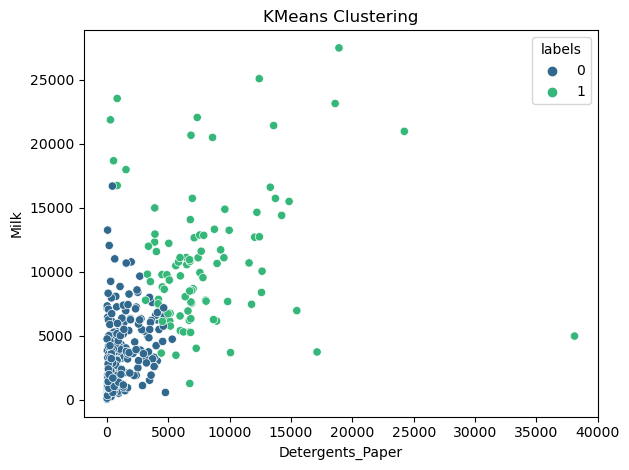

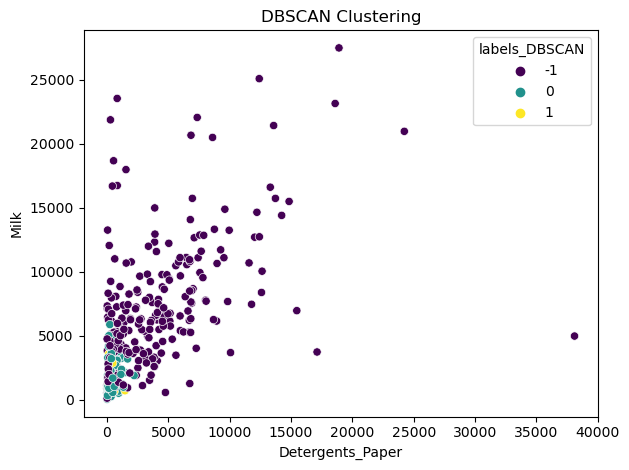

In [27]:
# Your code here

# K-Means scatter plot
sns.scatterplot(data=wholesale_customers, x='Detergents_Paper', y='Milk', hue='labels', palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.tight_layout()
plt.show()

# DBSCAN scatter plot
sns.scatterplot(data=wholesale_customers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.tight_layout()
plt.show()

In [ ]:
# Your code here:

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

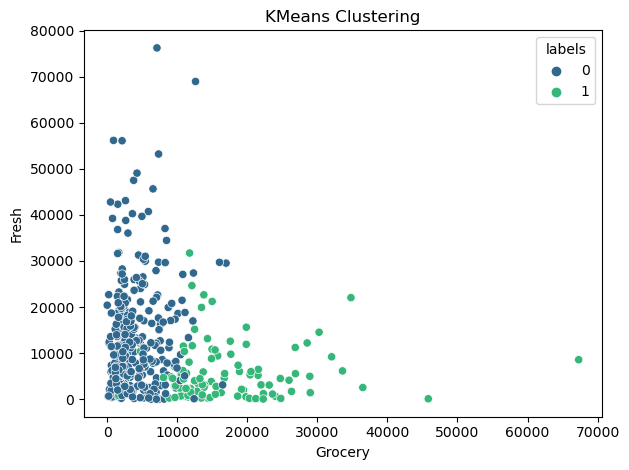

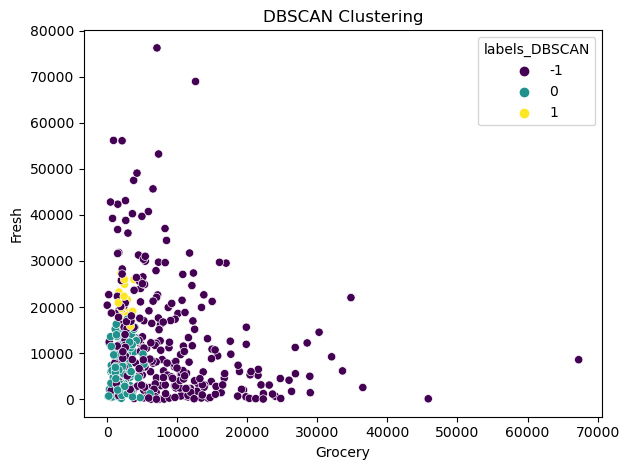

In [29]:
# Your code here:

# K-Means scatter plot
sns.scatterplot(data=wholesale_customers, x='Grocery', y='Fresh', hue='labels', palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.tight_layout()
plt.show()

# DBSCAN scatter plot
sns.scatterplot(data=wholesale_customers, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

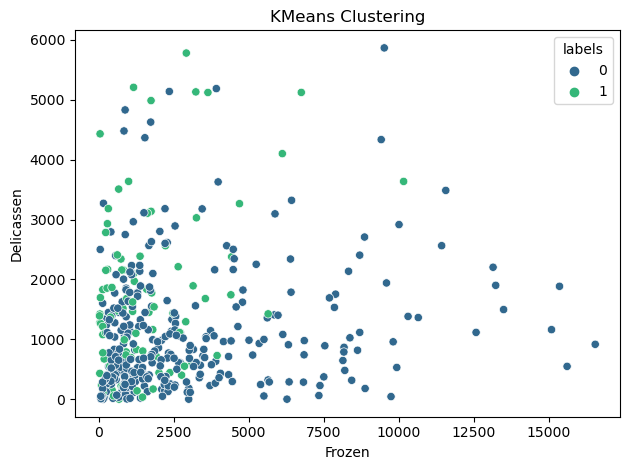

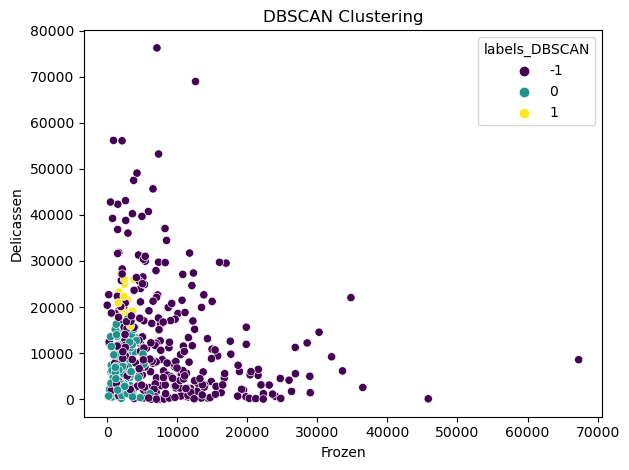

In [30]:
# Your code here:

# K-Means scatter plot
sns.scatterplot(data=wholesale_customers, x='Frozen', y='Delicassen', hue='labels', palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.tight_layout()
plt.show()

# DBSCAN scatter plot
sns.scatterplot(data=wholesale_customers, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [32]:
# Your code here:
# Groupby labels and calculate mean for all columns
kmeans_grouped_means = wholesale_customers.groupby('labels').mean()
print("Means grouped by KMeans labels:")
display(kmeans_grouped_means)

# Groupby labels_DBSCAN and calculate mean for all columns
dbscan_grouped_means = wholesale_customers.groupby('labels_DBSCAN').mean()
print("\nMeans grouped by DBSCAN labels:")
display(dbscan_grouped_means)

Means grouped by KMeans labels:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales,labels_DBSCAN
labels,,,,,,,,,,
0,1.137072,2.548287,12952.884735,3119.267913,4036.258567,2914.457944,957.034268,1083.140187,25063.043614,-0.529595
1,1.897959,2.520408,5848.020408,10941.877551,17528.591837,1518.183673,7897.602041,1645.938776,45380.214286,-1.000000



Means grouped by DBSCAN labels:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales,labels
labels_DBSCAN,,,,,,,,,,
-1,1.454545,2.541958,12483.937063,6460.888112,9499.272727,2994.975524,3588.755245,1491.646853,36519.475524,0.342657
0,1.017391,2.582609,6822.278261,1719.591304,2179.608696,1613.417391,406.095652,594.365217,13335.356522,0.000000
1,1.000000,2.277778,20889.666667,1556.777778,2555.222222,2345.388889,449.333333,779.277778,28575.666667,0.000000


Which algorithm appears to perform better?

**Your observations here**

- the algorithm that seems to perform better is K-means, as the scatterplots show clear clusters division using the K-Means, the exception is only for the last pair (Grocery vs Fresh)
- Also, based on the means,  K-Means shows distinct clusters with significante differences in feature emans, suggesting it captured distinct groups of customers

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


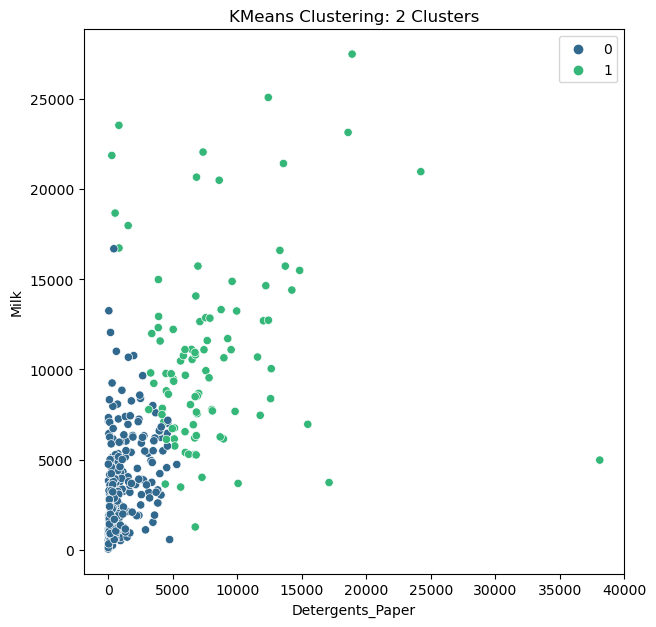

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


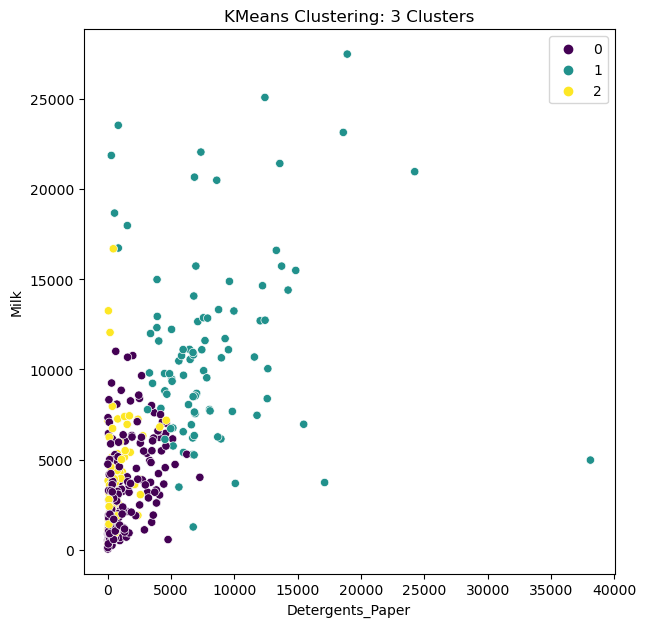

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


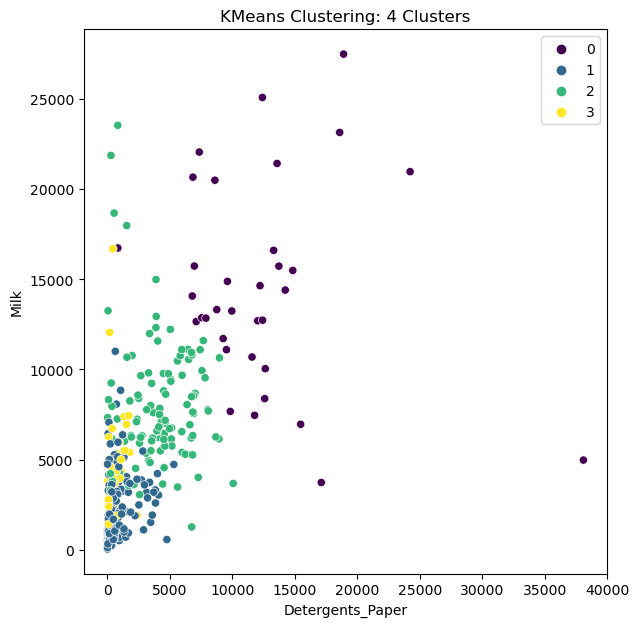

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


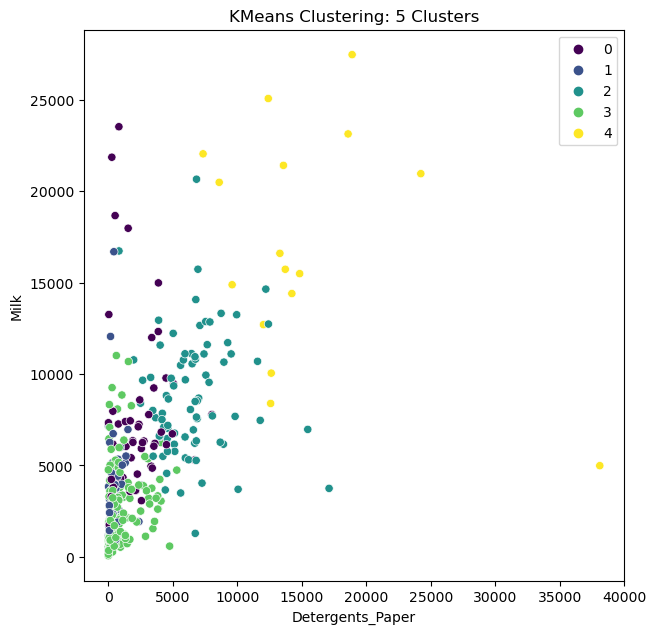

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


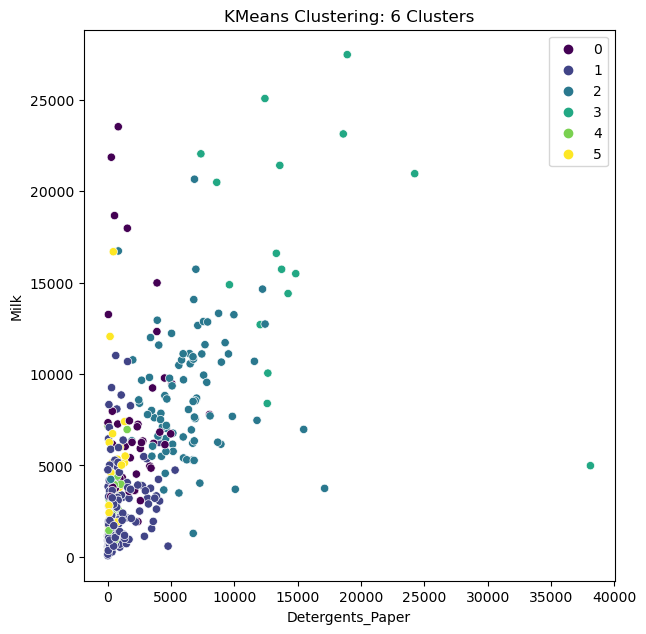

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


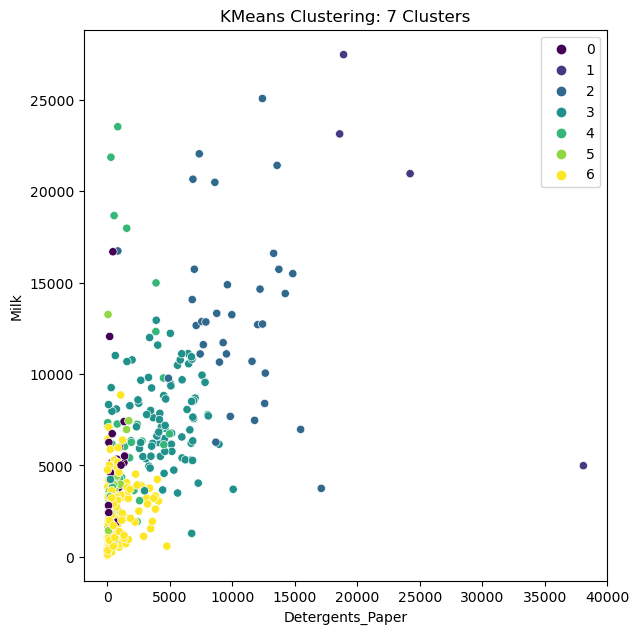

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


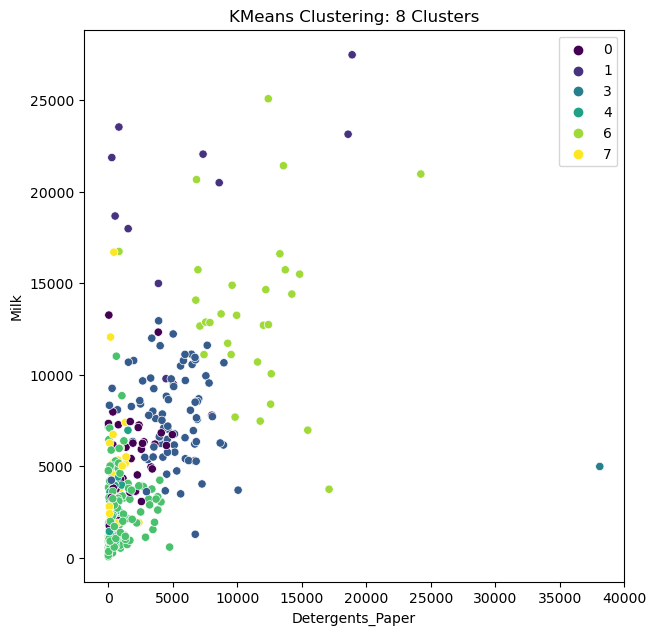

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


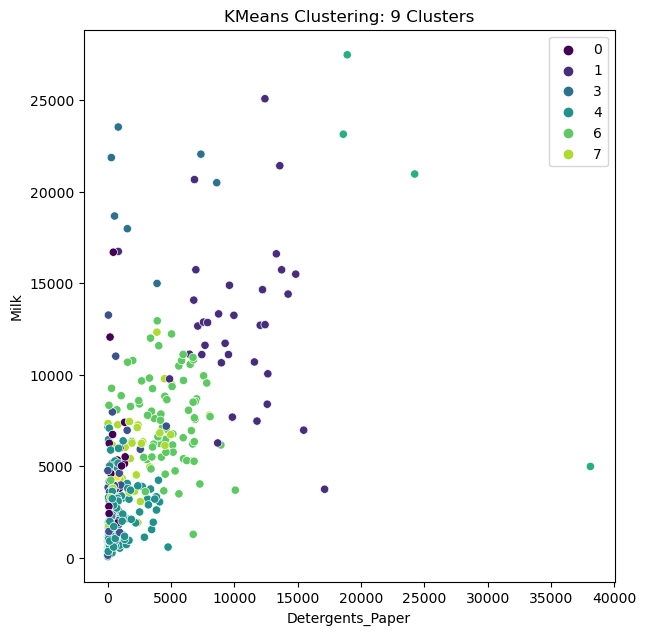

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


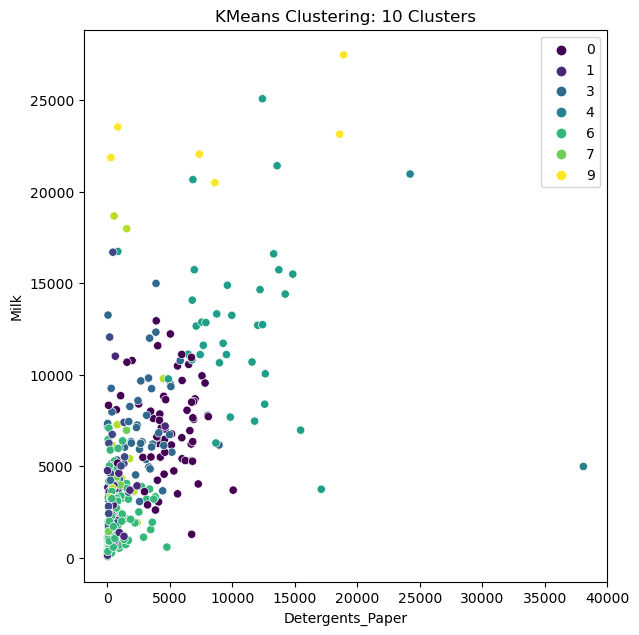

In [34]:
# Your code here:
#considering one pair from before, Detergents_paper and milk

n_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Function to create scatter plots for different numbers of clusters
for i, n_clusters in enumerate(n_clusters_list, 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features_df)    
    plt.figure(figsize=(18, 18))
    plt.subplot(3, 3, i)
    sns.scatterplot(x='Detergents_Paper', y='Milk', hue=labels, data=wholesale_customers, palette='viridis')
    plt.title(f'KMeans Clustering: {n_clusters} Clusters')
    plt.xlabel('Detergents_Paper')
    plt.ylabel('Milk')
    plt.tight_layout()
    plt.show()

**Your comment here**

- the best number of clusters would be 2, as the respective scatterplot is the one showing a clear cluster spearation with minimal overlap and a logical separation

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

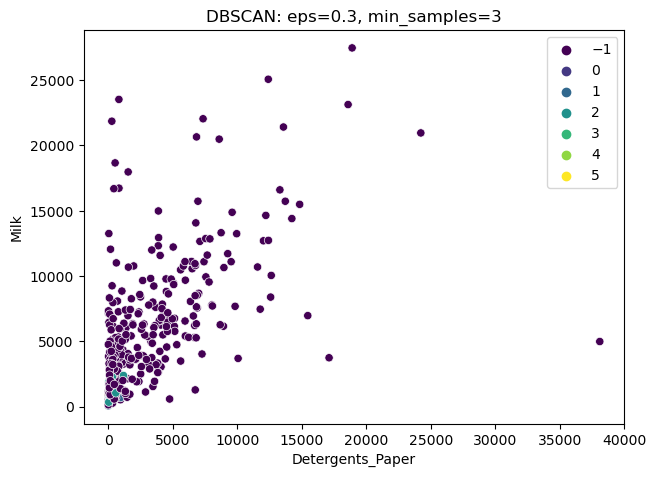

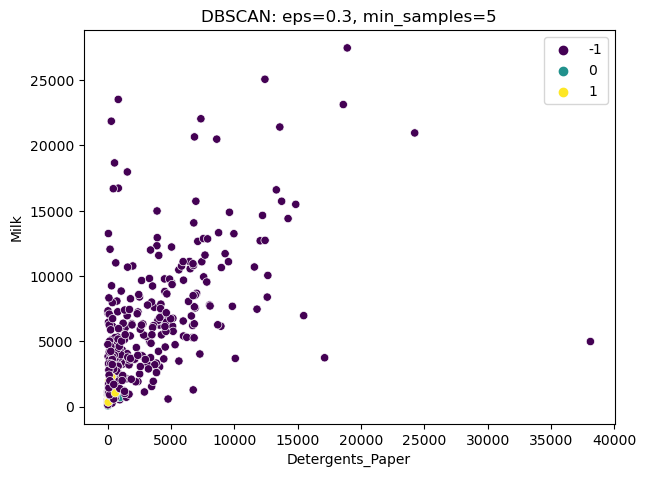

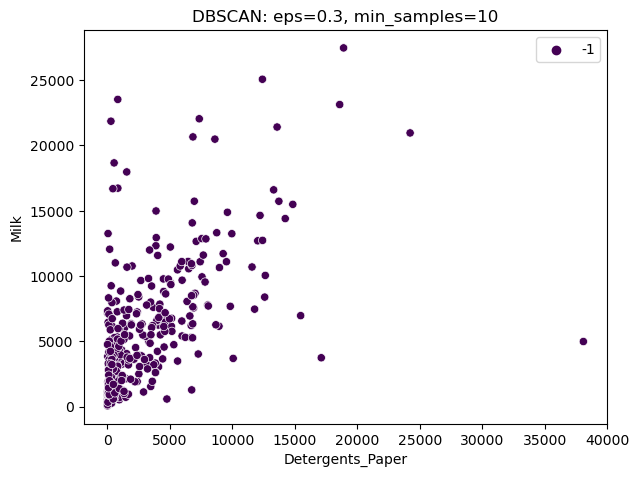

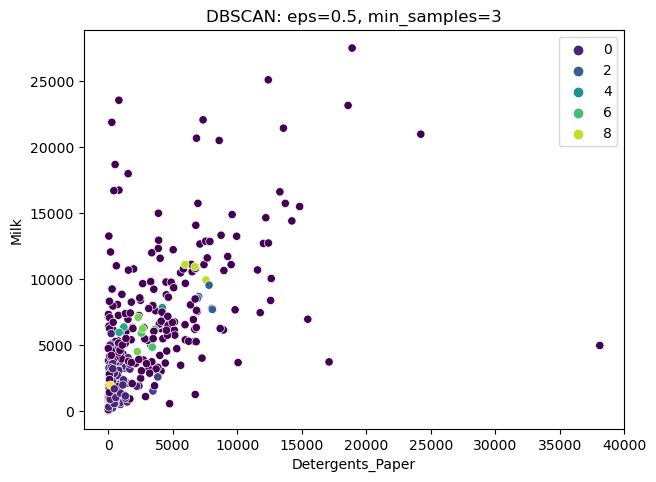

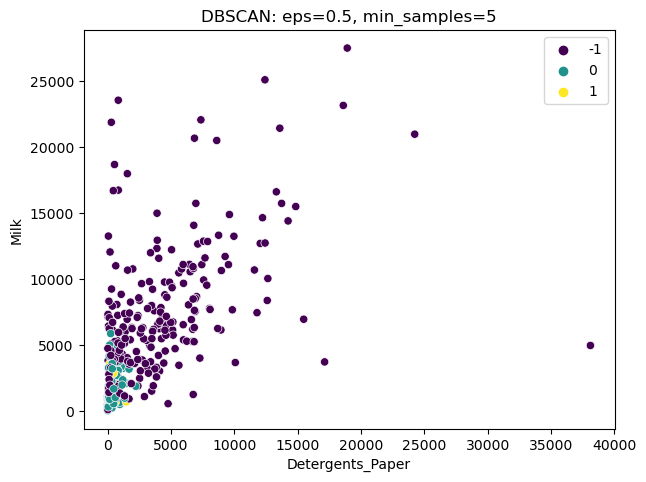

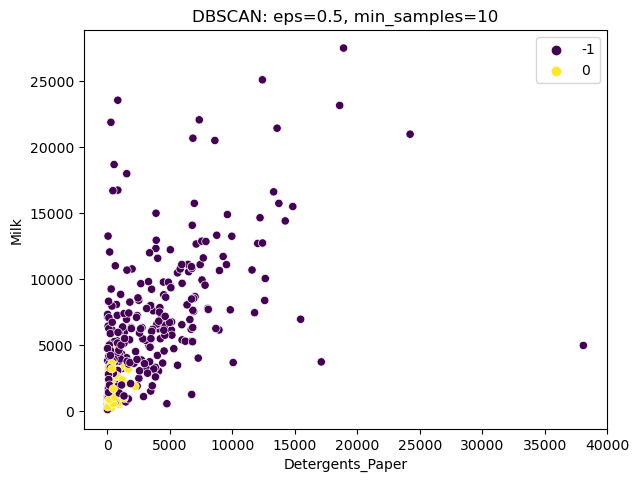

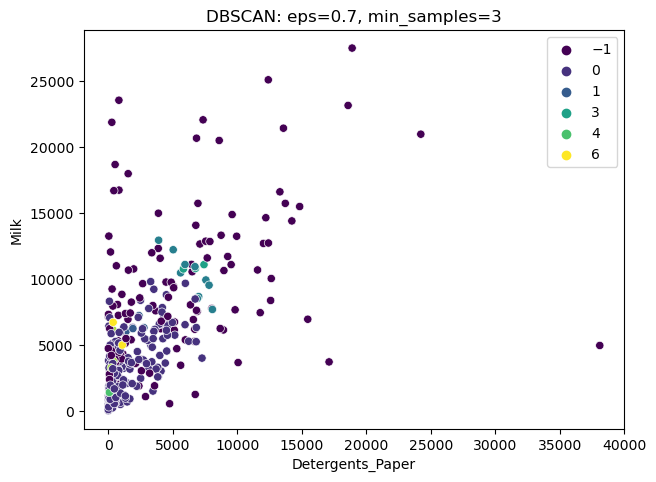

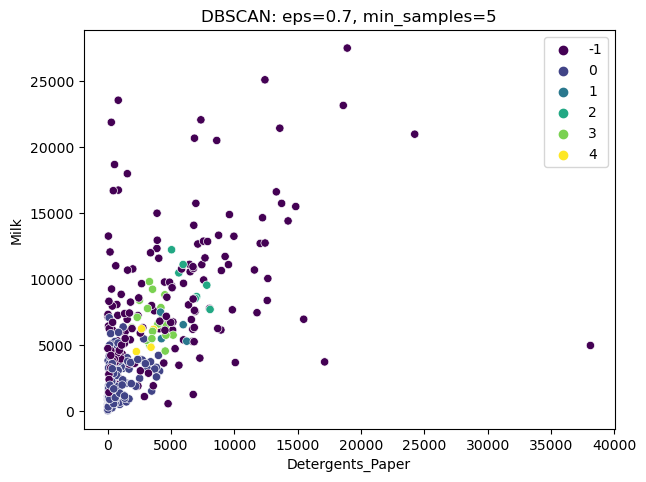

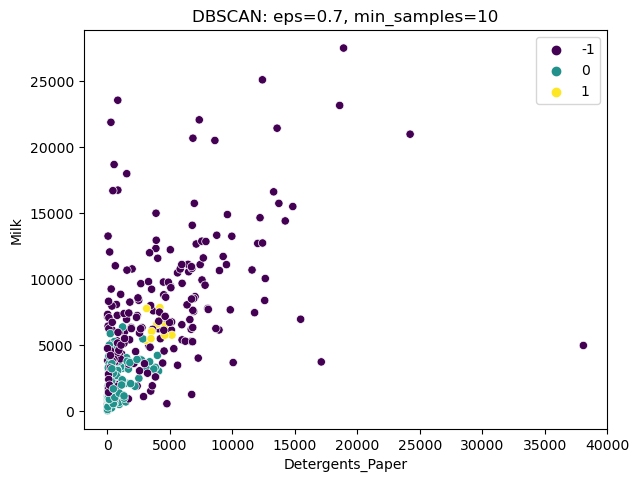

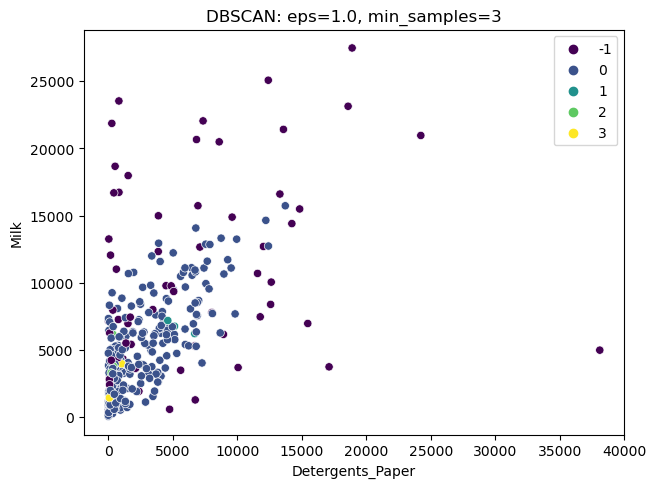

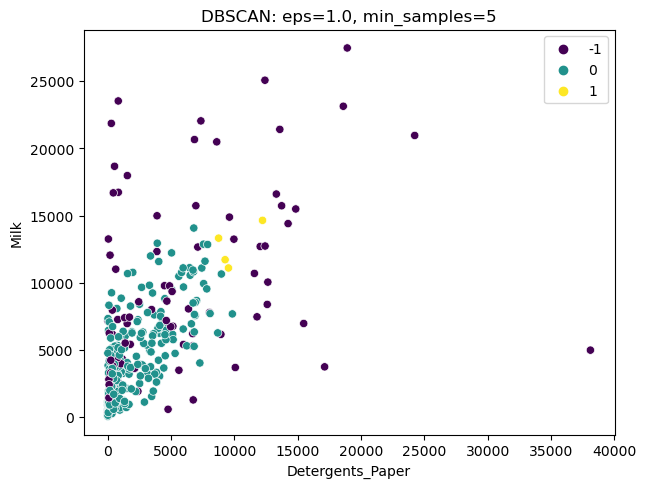

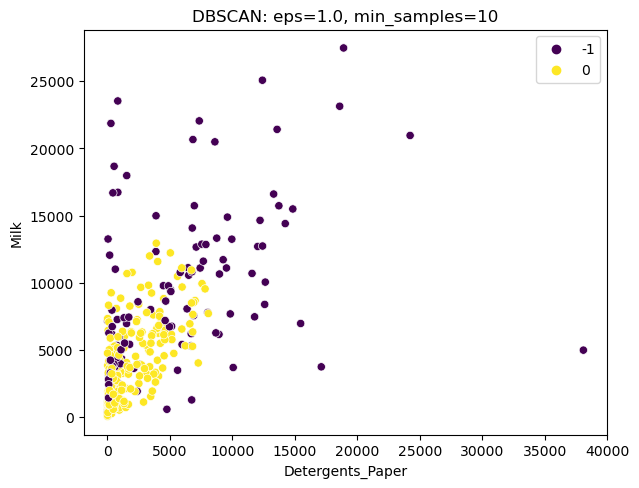

In [36]:
# Your code here

# different eps and min_samples to try
eps_list = [0.3, 0.5, 0.7, 1.0]
min_samples_list = [3, 5, 10]

# creating scatter plots for different eps and min_samples    
plot_number = 1
for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features_df)
        plt.figure(figsize=(18, 18))    
        plt.subplot(len(eps_list), len(min_samples_list), plot_number)
        sns.scatterplot(x='Detergents_Paper', y='Milk', hue=labels, data=wholesale_customers, palette='viridis')
        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
        plt.xlabel('Detergents_Paper')
        plt.ylabel('Milk')  
        plot_number += 1
        plt.tight_layout()
        plt.show()
    

**Your comment here**

- 